In [0]:
import pandas as pd
import re
from collections import Counter

train = pd.read_csv('drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/train.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/test.csv')
sub = pd.read_csv('drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/sample_submission.csv')

In [0]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}




In [0]:
# remove_URL remove_html remove_emoji tanıtıldı


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [0]:
myOwnStopList=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 
               'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',
               'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
               'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
               'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', "la",
               'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
               'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'what','how', 'all', 'any',
               'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
               'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'do', 'should', "should", 'now', 'd', 'm', 'o', 're', 've', 'y', 
               'ain', "are", 'could', "was","u",
                'would','have','get','got','getting','one','two','still','going']

In [0]:
train['text_cleaned'] = train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['text_cleaned'] = test['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
dic = {r"\b{}\b".format(k): v for k, v in contractions.items()}
train['text_cleaned'] = train['text_cleaned'].replace(dic, regex=True)
test['text_cleaned'] = test['text_cleaned'].replace(dic, regex=True)

In [0]:
train['text_cleaned']=train['text_cleaned'].apply(lambda x : remove_URL(x))
test['text_cleaned']=test['text_cleaned'].apply(lambda x : remove_URL(x))

In [0]:
train['text_cleaned']=train['text_cleaned'].apply(lambda x : remove_html(x))
test['text_cleaned']=test['text_cleaned'].apply(lambda x : remove_html(x))

In [0]:
train['text_cleaned']=train['text_cleaned'].apply(lambda x: remove_emoji(x))
test['text_cleaned']=test['text_cleaned'].apply(lambda x: remove_emoji(x))

In [0]:
train['text_cleaned'] = train['text_cleaned'].str.replace('[^\w\s]','')
test['text_cleaned'] = test['text_cleaned'].str.replace('[^\w\s]','')
train['text_cleaned'] = train['text_cleaned'].str.replace('[\d\_]','')
test['text_cleaned'] = test['text_cleaned'].str.replace('[\d\_]','')

In [89]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
train['text_cleaned'] = train['text_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
test['text_cleaned'] = test['text_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [0]:
sil = pd.Series(' '.join(train['text_cleaned']).split()).value_counts()[-50:]
sil = pd.Series(' '.join(test['text_cleaned']).split()).value_counts()[-50:]

train['text_cleaned'] = train['text_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
test['text_cleaned'] = test['text_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [92]:
from textblob import Word
nltk.download('wordnet')
train['text_cleaned'] = train['text_cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
test['text_cleaned'] = test['text_cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
train['text_cleaned'] = train['text_cleaned'].apply(lambda x: ' '.join([x for x in x.split() if x not in (myOwnStopList)]))
test['text_cleaned'] = test['text_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (myOwnStopList)]))


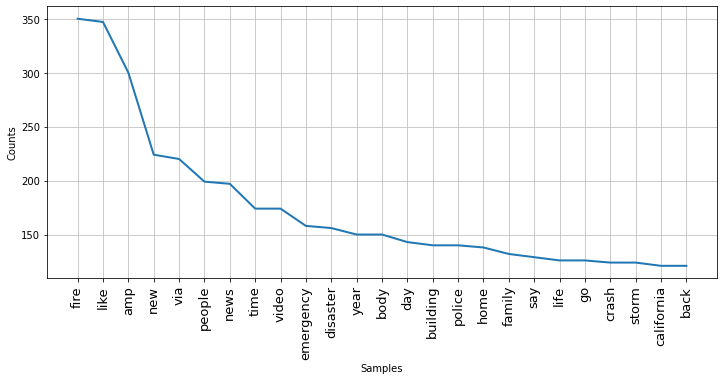

In [97]:
import matplotlib.pyplot as plt
all_texts = []
for line in list(train['text_cleaned']):
    texts = line.split()
    for text in texts:
        all_texts.append(text)
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_texts)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(all_texts).values(), reverse=True)


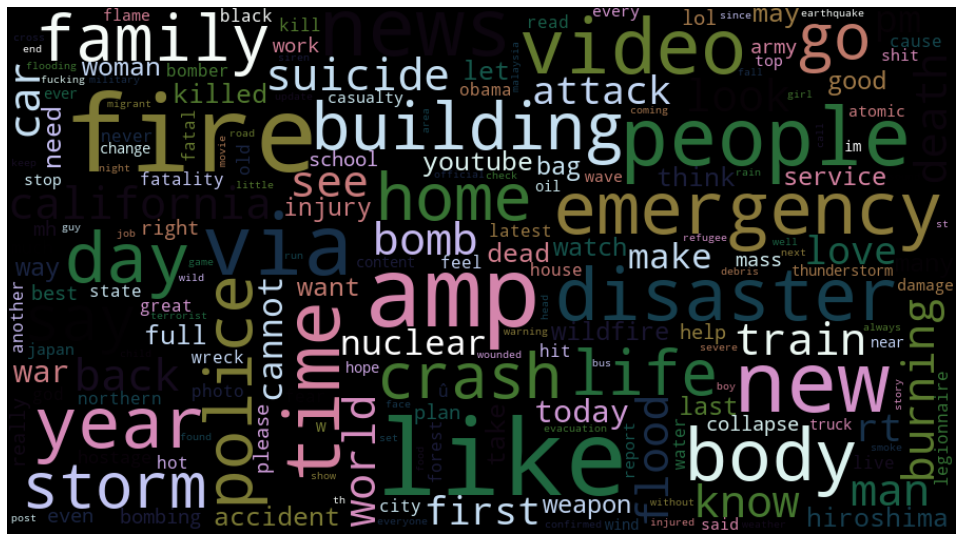

In [99]:
from wordcloud import WordCloud

# create a word frequency dictionary
wordfreq = Counter(all_texts)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=200,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='cubehelix_r',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [102]:
!pip --no-cache-dir install tokenizers==0.4.2

     |████████████████████████████████| 3.7MB 2.8MB/s 


In [107]:
toBeCleanedNew='[%s]' % ' '.join(map(str, all_texts))#remove all the quation marks and commas.
print(toBeCleanedNew)

[deed reason earthquake may allah forgive forest fire near ronge sask canada resident asked shelter place notified officer evacuation shelter place order expected people receive wildfire evacuation order california sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado spring area top hill see fire wood emergency evacuation happening building across street afraid tornado coming area three people died heat wave far haha south tampa flooded hah wait second live south tampa gonna gonna fvck flooding raining flooding florida tampabay tampa day lost count flood bago myanmar arrived bago damage school bus multi car crash breaking man love fruit summer lovely car fast goooooooaaaaaal ridiculous london cool love skiing wonderful day looooool wayi cannot eat shit nyc last week love girlfriend cooool like pasta end bbcmtd wholesale market ablaze

In [0]:
tokenizer = SentencePieceBPETokenizer()

path="drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/tobeTrained.txt"
#set vocab_size to 15000 as the len(train_set)was something like 12500 
tokenizer.train(files=path, vocab_size=15_000, min_frequency=2, special_tokens=[
   "<pad>",
   "<s>",
   "</s>",
   "<unk>",
   "<mask>",
])

In [109]:
tokenizer.save(".", "drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/tokenedText")

['./drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/tokenedText-vocab.json',
 './drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/tokenedText-merges.txt']

In [110]:
output = tokenizer.encode("deeds reason earthquake may allah forgive")
print(output.ids,output.tokens, output.offsets)

[97, 3153, 1605, 987, 394, 3483, 11024] ['▁de', 'eds', '▁reason', '▁earthquake', '▁may', '▁allah', '▁forgive'] [(0, 3), (3, 6), (6, 13), (13, 24), (24, 28), (28, 34), (34, 42)]


In [114]:
decode=tokenizer.decode([97, 3153, 1605, 987, 394, 3483, 11024])
print(decode)

deeds reason earthquake may allah forgive


In [0]:
from sklearn.model_selection import train_test_split
X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split(
  train['text_cleaned'],train['target'], test_size=0.2, random_state=42)

In [119]:
from tokenizers.implementations import SentencePieceBPETokenizer
from tokenizers.processors import BertProcessing

tokenizer =SentencePieceBPETokenizer(
    './drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/tokenedText-vocab.json',
    './drive/My Drive/Colab Notebooks/NLP/Kaggle-Dissaster/tokenedText-merges.txt' 
)
tokenizer._tokenizer.post_processor = BertProcessing(
   ("</s>", tokenizer.token_to_id("</s>")),
  ("<s>", tokenizer.token_to_id("<s>")),
)
tokenizer.enable_truncation(max_length=512)

X_subtrain_tokened=X_subtrain.apply(lambda x:tokenizer.encode(x).ids)
X_subtrain_tokened.head()

4996    [1, 10732, 290, 3285, 6654, 537, 1576, 900, 22...
3263    [1, 7530, 3801, 89, 555, 6033, 5364, 69, 351, ...
4907    [1, 1390, 8223, 452, 220, 10213, 4869, 4206, 2...
2855    [1, 5268, 338, 1221, 1994, 3999, 3472, 949, 90...
4716    [1, 5683, 1508, 1406, 216, 1021, 401, 5659, 21...
Name: text_cleaned, dtype: object

In [120]:
X_subtest_tokened=X_subtest.apply(lambda x:tokenizer.encode(x).ids)
X_subtest_tokened.head()

2644      [1, 159, 628, 871, 252, 9373, 48, 664, 1300, 2]
2227    [1, 329, 3537, 739, 80, 268, 1430, 113, 1926, ...
5448    [1, 3839, 3734, 13, 10396, 479, 80, 10396, 501...
132     [1, 2034, 409, 765, 2656, 801, 470, 688, 984, ...
6845    [1, 2919, 1308, 910, 10592, 5653, 1396, 1356, ...
Name: text_cleaned, dtype: object

In [121]:
test["Tokened_Text"]=test["text_cleaned"].apply(lambda x:tokenizer.encode(x).ids)
test.head()

,id,keyword,location,text,text_cleaned,Tokened_Text
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash,"[1, 2283, 4418, 333, 353, 2]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,"[1, 1452, 987, 2708, 721, 1483, 3659, 984, 2]"
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,"[1, 791, 176, 1894, 5848, 201, 1002, 10829, 22..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,"[1, 1466, 7584, 189, 218, 319, 666, 2]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,"[1, 1542, 2040, 312, 1206, 2828, 2]"


In [122]:
from collections import Counter
subtrain_tokened=[]
for i in X_subtrain_tokened:
    subtrain_tokened+=i
print("Total amount of tokens in train dataset is:", len(subtrain_tokened))
distinct_list= (Counter(subtrain_tokened).keys())
print("The vocabulary size in subtrain dataset is :",len(distinct_list))

Total amount of tokens in train dataset is: 79156
The vocabulary size in subtrain dataset is : 10109


In [123]:
print(max(distinct_list))

11965


In [124]:
subtest_tokened=[]
for i in X_subtest_tokened:
    subtest_tokened+=i
print("Total amount of tokens in train dataset is:", len(subtest_tokened))
distinct_list_2= (Counter(subtest_tokened).keys())
print("The vocabulary size in subtrain dataset is :",len(distinct_list_2))

Total amount of tokens in train dataset is: 19831
The vocabulary size in subtrain dataset is : 5794


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


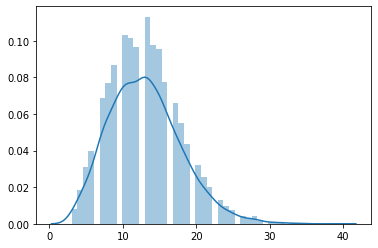

In [127]:
# length distribution in tokened subtrain dataset
import numpy as np
import seaborn as sns
subtrain_length_dist=[]
i=0
for l in X_subtrain_tokened:
    subtrain_length_dist+=[len(l)]
y = np.array(subtrain_length_dist)
sns.distplot(y);


In [195]:
import keras
max_len=30
x_train = keras.preprocessing.sequence.pad_sequences(X_subtrain_tokened, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(X_subtest_tokened, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (6090, 30)
x_test shape: (1523, 30)


In [196]:
import tensorflow as tf
embedding_dim=128
vocab_size=12000
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 30, 128)           1536000   
_________________________________________________________________
bidirectional_30 (Bidirectio (None, 30, 128)           98816     
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 30, 64)            41216     
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 30, 32)            10368     
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 32)                6272      
_________________________________________________________________
dense_17 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [0]:
y_train=y_subtrain
y_test=y_subtest

In [198]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import TensorBoard
import datetime
from tensorflow.python.keras.callbacks import TensorBoard

#logs_base_dir = "./logs"
#logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=8)
history=model.fit(x_train, y_train,
          batch_size=400,
          epochs=2,
          validation_data=[x_test, y_test]) 

Epoch 1/2
16/16 [==============================] - 10s 647ms/step - loss: 0.6835 - accuracy: 0.5695 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
16/16 [==============================] - 8s 484ms/step - loss: 0.6174 - accuracy: 0.6673 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [0]:
predictions = model.predict_classes(x_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

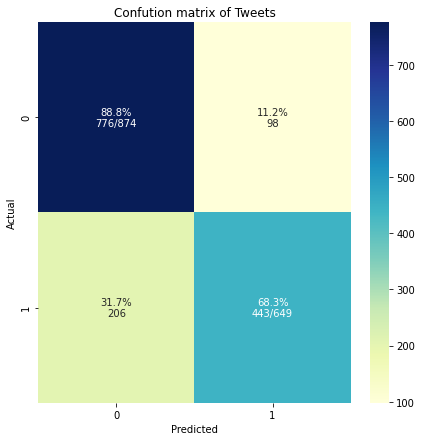

In [200]:
plot_cm(y_test,predictions, 'Confution matrix of Tweets', figsize=(7,7))

In [192]:
predictions

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=int32)